The best position found is: tensor([2.8577, 5.5391])
The minimum value of the function is: 685.8092651367188
records: torch.Size([107, 2])


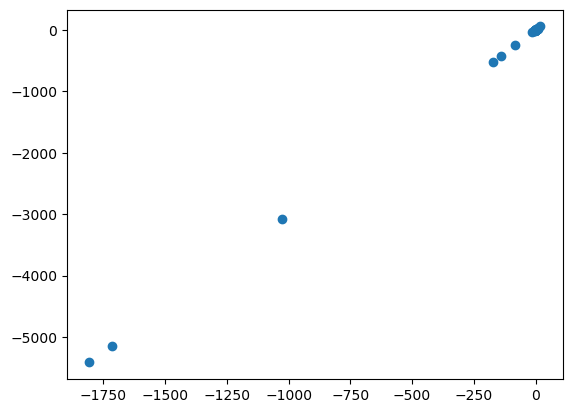

In [2]:
import torch
import random
import matplotlib.pyplot as plt
inertia_weight = 0.1  # Inertia weight
c1_weight = 1    # Cognitive (particle's best) weight
c2_weight = 2    # Social (swarm's best) weight

a = 1.3
b = 99.0
# (a,a^2有极小值)
def fintess(x):
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

# HACK 用来绘制图像
history_best_records = torch.tensor([[-1, -1]])

def stack_in_records(t):
    global history_best_records
    history_best_records = torch.cat((history_best_records, t.unsqueeze(0)), dim=0)

# Particle class
class Particle:
    def __init__(self, x0):
        self.position = x0
        self.velocity = random.uniform(-1, 1)
        self.best_position = x0
        self.best_value = fintess(x0)

    def update_velocity(self, global_best_position):

        r1 = random.random()
        r2 = random.random()

        cognitive_velocity = c1_weight * r1 * (self.best_position - self.position)
        social_velocity = c2_weight * r2 * (global_best_position - self.position)
        self.velocity = inertia_weight * self.velocity + cognitive_velocity + social_velocity

    def move(self):
        self.position += self.velocity
        value = fintess(self.position)

        if value < self.best_value:
            self.best_position = self.position
            self.best_value = value


# PSO algorithm
def algorithm(particle_vals, num_iterations):
    particles = [Particle(particle_vals[i]) for i in range(len(particle_vals))]
    global_best_position = min(particles, key=lambda p: p.best_value).position

    counter = 0
    for _ in range(num_iterations):
        for particle in particles:
            particle.update_velocity(global_best_position)
            particle.move()

            if particle.best_value < fintess(global_best_position):
                global_best_position = particle.best_position
                if counter >= 20:
                    counter = 0
                    stack_in_records(global_best_position)
                counter+=1


    return global_best_position

# 生成初始参数规定范围，
minV, maxV = -100.0, 100.0
size = [2]

particle_num = 100
iteratons = 50
poses = [torch.rand(size) * (maxV - minV) + minV for i in range(particle_num)]

# Running PSO
best_position = algorithm(poses, iteratons)
print(f"The best position found is: {best_position}")
print(f"The minimum value of the function is: {fintess(best_position)}")
print(f"records: {history_best_records.shape}")
# 使用 torch.chunk 分割张量
x, y = torch.chunk(history_best_records, 2, dim=1)  # 在第二个维度上将张量分成2块
x = x.squeeze(dim=1).numpy()
y = y.squeeze(dim=1).numpy()
plt.scatter(x, y)

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot
plt.plot(x, y, '-r', label='sin(x)')  # '-r' is a red solid line

# Customization
plt.title("Sin Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.legend()

# Show plot
plt.show()
